In [121]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("df_segmented.csv")

# Lihat 5 baris pertama
display(df.head())
# print(df.head())

# Info kolom & tipe data
print(df.info())

# Cek missing values
print(df.isnull().sum())

# Statistik ringkasan
print(df.describe(include='all'))

,CustomerID,ProductID,Quantity,Price,TransactionDate,PaymentMethod,StoreLocation,ProductCategory,DiscountApplied,TotalAmount,Year,Month,Day,Weekday,Hour,PriceAfterDiscount,Revenue,Segment
0,109318,C,7,80.079844,2023-12-26 12:32:00,Cash,"176 Andrew Cliffs\r\nBaileyfort, HI 93354",Books,18.677100,455.862764,2023,12,26,Tuesday,12,65.123252,455.862764,Recent Customers
1,993229,C,4,75.195229,2023-08-05 00:00:00,Cash,"11635 William Well Suite 809\r\nEast Kara, MT ...",Home Decor,14.121365,258.306546,2023,8,5,Saturday,0,64.576637,258.306546,Frequent Buyers
2,579675,A,8,31.528816,2024-03-11 18:51:00,Cash,"910 Mendez Ville Suite 909\r\nPort Lauraland, ...",Books,15.943701,212.015651,2024,3,11,Monday,18,26.501956,212.015651,Loyal Customers
3,799826,D,5,98.880218,2023-10-27 22:00:00,PayPal,"87522 Sharon Corners Suite 500\r\nLake Tammy, ...",Books,6.686337,461.343769,2023,10,27,Friday,22,92.268754,461.343769,Frequent Buyers
4,121413,A,7,93.188512,2023-12-22 11:38:00,Cash,"0070 Michelle Island Suite 143\r\nHoland, VA 8...",Electronics,4.030096,626.030484,2023,12,22,Friday,11,89.432926,626.030484,Champions


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CustomerID          100000 non-null  int64  
 1   ProductID           100000 non-null  object 
 2   Quantity            100000 non-null  int64  
 3   Price               100000 non-null  float64
 4   TransactionDate     100000 non-null  object 
 5   PaymentMethod       100000 non-null  object 
 6   StoreLocation       100000 non-null  object 
 7   ProductCategory     100000 non-null  object 
 8   DiscountApplied     100000 non-null  float64
 9   TotalAmount         100000 non-null  float64
 10  Year                100000 non-null  int64  
 11  Month               100000 non-null  int64  
 12  Day                 100000 non-null  int64  
 13  Weekday             100000 non-null  object 
 14  Hour                100000 non-null  int64  
 15  PriceAfterDiscount  100000 non-null

In [122]:
# Segment Profiling Summary
profiling = df.groupby('Segment').agg(
    CustomerCount=('CustomerID', 'nunique'),
    TotalRevenue=('Revenue', 'sum'),
    TotalTransactions=('CustomerID', 'count')
).reset_index()

# Menambahkan kolom rata-rata revenue per transaksi
profiling['AvgRevenuePerTransaction'] = profiling['TotalRevenue'] / profiling['TotalTransactions']

# Urutkan berdasarkan TotalRevenue
profiling = profiling.sort_values(by='TotalRevenue', ascending=False)

# Tampilkan hasil
profiling.style.format({
    'TotalRevenue': 'Rp{:,.0f}',
    'AvgRevenuePerTransaction': 'Rp{:,.2f}'
})


,Segment,CustomerCount,TotalRevenue,TotalTransactions,AvgRevenuePerTransaction
0,Big Spenders,13303,"Rp5,939,901",13303,Rp446.51
2,Frequent Buyers,22083,"Rp5,908,984",23791,Rp248.37
6,Recent Customers,14808,"Rp3,667,746",14808,Rp247.69
1,Champions,7315,"Rp3,613,594",9787,Rp369.22
4,Loyal Customers,16135,"Rp2,966,605",16740,Rp177.22
5,Others,11850,"Rp1,498,558",11850,Rp126.46
3,Lost,9721,"Rp1,238,107",9721,Rp127.36


### 🧮 Segment Profiling Summary

Berikut adalah rangkuman profil tiap segmen berdasarkan:
- Jumlah pelanggan unik (CustomerCount)
- Total pendapatan (TotalRevenue)
- Jumlah transaksi
- Rata-rata revenue per transaksi

Ini berguna untuk mengetahui segmen mana yang paling menguntungkan dan memiliki pelanggan paling aktif.


C:\Users\HP\AppData\Local\Temp\ipykernel_1284\3844687600.py:19: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


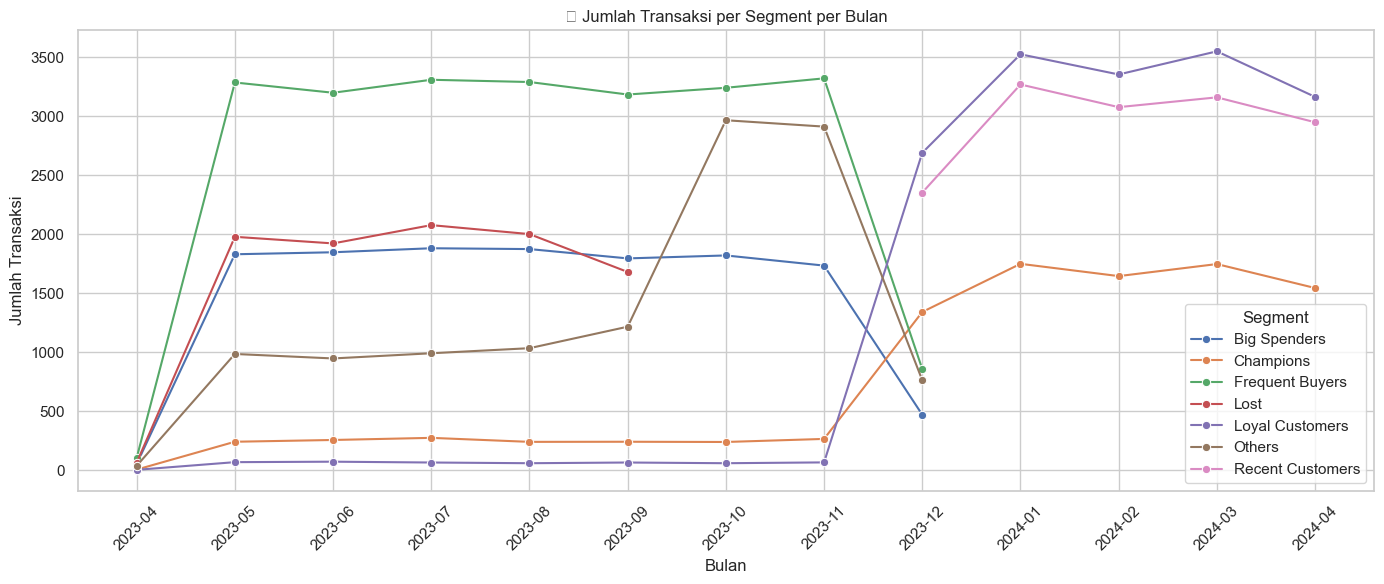

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan 'transactiondate' sudah jadi datetime dan ada kolom 'segment'
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['YearMonth'] = df['TransactionDate'].dt.to_period('M').astype(str)

# Hitung jumlah transaksi per segment per bulan
monthly_segment = df.groupby(['YearMonth', 'Segment']).size().reset_index(name='transaction_count')

# Visualisasi
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_segment, x='YearMonth', y='transaction_count', hue='Segment', marker='o')
plt.title('📊 Jumlah Transaksi per Segment per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend(title='Segment')
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_1284\2295682542.py:12: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


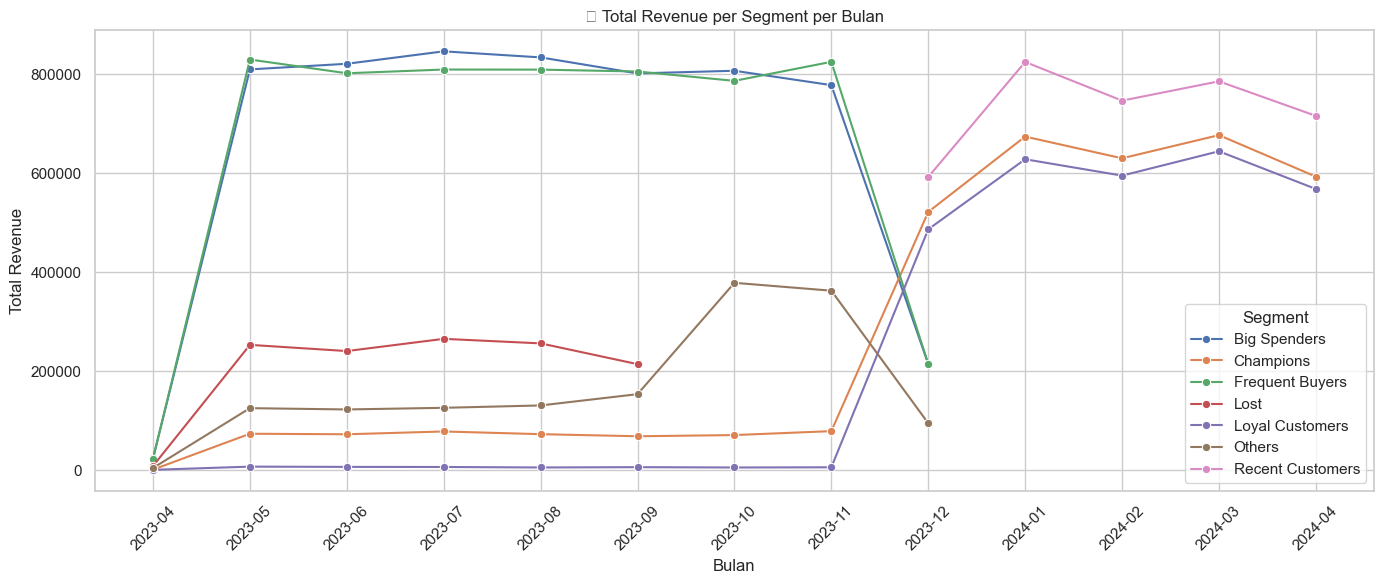

In [124]:
# Revenue per segment per bulan
monthly_revenue = df.groupby(['YearMonth', 'Segment'])['TotalAmount'].sum().reset_index()

# Visualisasi
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_revenue, x='YearMonth', y='TotalAmount', hue='Segment', marker='o')
plt.title('💰 Total Revenue per Segment per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend(title='Segment')
plt.show()


## 📌 Insight & Rekomendasi Bisnis

### 🔍 Insight Utama:

1. **Frequent Buyers** menjadi kontributor transaksi terbesar secara konsisten, tetapi **Average Revenue per Transaction** mereka cukup rendah (USD 248.37).
2. **Big Spenders** menghasilkan total revenue tertinggi meskipun jumlah transaksinya lebih sedikit dibanding Frequent Buyers, dengan **transaksi bernilai tinggi** (USD 446.51 per transaksi).
3. **Recent Customers** menunjukkan potensi yang baik — meskipun baru bergabung, mereka sudah memiliki kontribusi transaksi dan revenue yang signifikan.
4. **Loyal Customers** dan **Champions** memiliki volume transaksi yang cukup stabil. Namun, Champions memiliki **rata-rata revenue per transaksi tertinggi kedua** (USD 369.22), menunjukkan potensi untuk strategi premium.
5. **Segment Lost** dan **Others** menyumbang volume dan revenue paling kecil, bisa jadi target untuk strategi re-engagement.

### 💡 Rekomendasi Strategi Bisnis:

#### 🎯 Segmentasi & Targeting
- **Frequent Buyers**: Tawarkan program loyalitas berbasis poin atau _bulk discount_ untuk mendorong peningkatan nilai transaksi rata-rata.
- **Big Spenders**: Kembangkan program VIP, seperti _early access_, _personal shopper_, atau diskon eksklusif untuk menjaga kepuasan mereka.
- **Recent Customers**: Kirimkan nurturing campaign dengan edukasi produk dan penawaran khusus untuk mendorong pembelian berulang.
- **Loyal Customers & Champions**: Fokus pada retensi dengan program penghargaan loyalitas, _anniversary rewards_, atau _referral bonus_.
- **Lost Customers**: Buat re-engagement campaign seperti diskon pembelian kembali, email reminder produk yang pernah dibeli, atau _limited-time offer_.

#### 📆 Berdasarkan Time Series
- Terlihat adanya penurunan transaksi di beberapa segmen menjelang akhir tahun → analisis lebih lanjut apakah penyebabnya karena faktor musiman, promosi, atau kompetitor.
- Awal tahun 2024 menunjukkan peningkatan signifikan untuk segmen **Loyal Customers** dan **Recent Customers** → bisa jadi hasil dari campaign akhir tahun yang berhasil → strategi serupa bisa direplikasi.

---



In [125]:
# print(df.columns)
display(df.head())
print(df.head())

,CustomerID,ProductID,Quantity,Price,TransactionDate,PaymentMethod,StoreLocation,ProductCategory,DiscountApplied,TotalAmount,Year,Month,Day,Weekday,Hour,PriceAfterDiscount,Revenue,Segment,YearMonth
0,109318,C,7,80.079844,2023-12-26 12:32:00,Cash,"176 Andrew Cliffs\r\nBaileyfort, HI 93354",Books,18.677100,455.862764,2023,12,26,Tuesday,12,65.123252,455.862764,Recent Customers,2023-12
1,993229,C,4,75.195229,2023-08-05 00:00:00,Cash,"11635 William Well Suite 809\r\nEast Kara, MT ...",Home Decor,14.121365,258.306546,2023,8,5,Saturday,0,64.576637,258.306546,Frequent Buyers,2023-08
2,579675,A,8,31.528816,2024-03-11 18:51:00,Cash,"910 Mendez Ville Suite 909\r\nPort Lauraland, ...",Books,15.943701,212.015651,2024,3,11,Monday,18,26.501956,212.015651,Loyal Customers,2024-03
3,799826,D,5,98.880218,2023-10-27 22:00:00,PayPal,"87522 Sharon Corners Suite 500\r\nLake Tammy, ...",Books,6.686337,461.343769,2023,10,27,Friday,22,92.268754,461.343769,Frequent Buyers,2023-10
4,121413,A,7,93.188512,2023-12-22 11:38:00,Cash,"0070 Michelle Island Suite 143\r\nHoland, VA 8...",Electronics,4.030096,626.030484,2023,12,22,Friday,11,89.432926,626.030484,Champions,2023-12


   CustomerID ProductID  Quantity      Price     TransactionDate  \
0      109318         C         7  80.079844 2023-12-26 12:32:00   
1      993229         C         4  75.195229 2023-08-05 00:00:00   
2      579675         A         8  31.528816 2024-03-11 18:51:00   
3      799826         D         5  98.880218 2023-10-27 22:00:00   
4      121413         A         7  93.188512 2023-12-22 11:38:00   

  PaymentMethod                                      StoreLocation  \
0          Cash          176 Andrew Cliffs\r\nBaileyfort, HI 93354   
1          Cash  11635 William Well Suite 809\r\nEast Kara, MT ...   
2          Cash  910 Mendez Ville Suite 909\r\nPort Lauraland, ...   
3        PayPal  87522 Sharon Corners Suite 500\r\nLake Tammy, ...   
4          Cash  0070 Michelle Island Suite 143\r\nHoland, VA 8...   

  ProductCategory  DiscountApplied  TotalAmount  Year  Month  Day   Weekday  \
0           Books        18.677100   455.862764  2023     12   26   Tuesday   
1      Home 

In [127]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# 1. Buat kolom TransactionID gabungan (CustomerID + TransactionDate)
df['TransactionID'] = df['CustomerID'].astype(str) + '_' + df['TransactionDate'].astype(str)

# Lihat distribusi
produk_per_transaksi = df.groupby('TransactionID')['ProductID'].nunique()

# Lihat distribusi
produk_per_transaksi.value_counts().sort_index()

# display(df.head())

# 2. Group by TransactionID → list of ProductID
# basket_data = df.groupby('TransactionID')['ProductID'].apply(list).tolist()

# # 3. Transform ke one-hot encoded format
# te = TransactionEncoder()
# te_ary = te.fit(basket_data).transform(basket_data)
# df_basket = pd.DataFrame(te_ary, columns=te.columns_)

# # 4. Apriori: cari frequent itemsets
# frequent_itemsets = apriori(df_basket, min_support=0.01, use_colnames=True)

# # 5. Buat association rules
# rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# # 6. Tampilkan top 10 rule terbaik
# rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(by='lift', ascending=False).head(10)


ProductID
1    100000
Name: count, dtype: int64

In [128]:
# Group data by CustomerID
customer_summary = df.groupby('CustomerID').agg({
    'TransactionDate': 'count',          # Jumlah transaksi
    'Revenue': 'sum',                    # Total revenue
    'Quantity': 'sum',                   # Total quantity
    'TotalAmount': 'sum',                # Total belanja (sebelum diskon)
    'PriceAfterDiscount': 'mean'         # Rata-rata harga beli
}).reset_index()

# Rename columns biar lebih jelas
customer_summary.columns = ['CustomerID', 'TotalTransactions', 'TotalRevenue', 'TotalQuantity', 'TotalAmount', 'AvgPriceAfterDiscount']

# Urutkan berdasarkan TotalRevenue descending
customer_summary_sorted = customer_summary.sort_values(by='TotalRevenue', ascending=False)

# Tampilkan 10 pelanggan teratas
customer_summary_sorted.head(10)


,CustomerID,TotalTransactions,TotalRevenue,TotalQuantity,TotalAmount,AvgPriceAfterDiscount
3094,32895,3,2002.072661,23,2002.072661,86.951821
75746,796166,3,1647.517063,22,1647.517063,74.848304
93367,980072,3,1636.196111,23,1636.196111,70.197261
32522,340516,4,1604.858454,27,1604.858454,62.676413
37400,392763,3,1587.407591,21,1587.407591,76.679333
10168,107574,2,1574.768981,17,1574.768981,92.565989
86011,903169,2,1563.851160,17,1563.851160,91.893261
74206,780013,2,1519.193458,17,1519.193458,89.023296
78403,823783,3,1441.329882,22,1441.329882,64.414046
15040,159085,3,1430.491172,18,1430.491172,70.865328


C:\Users\HP\AppData\Local\Temp\ipykernel_1284\127292019.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CustomerID', y='TotalRevenue', data=top_customers, palette='viridis')


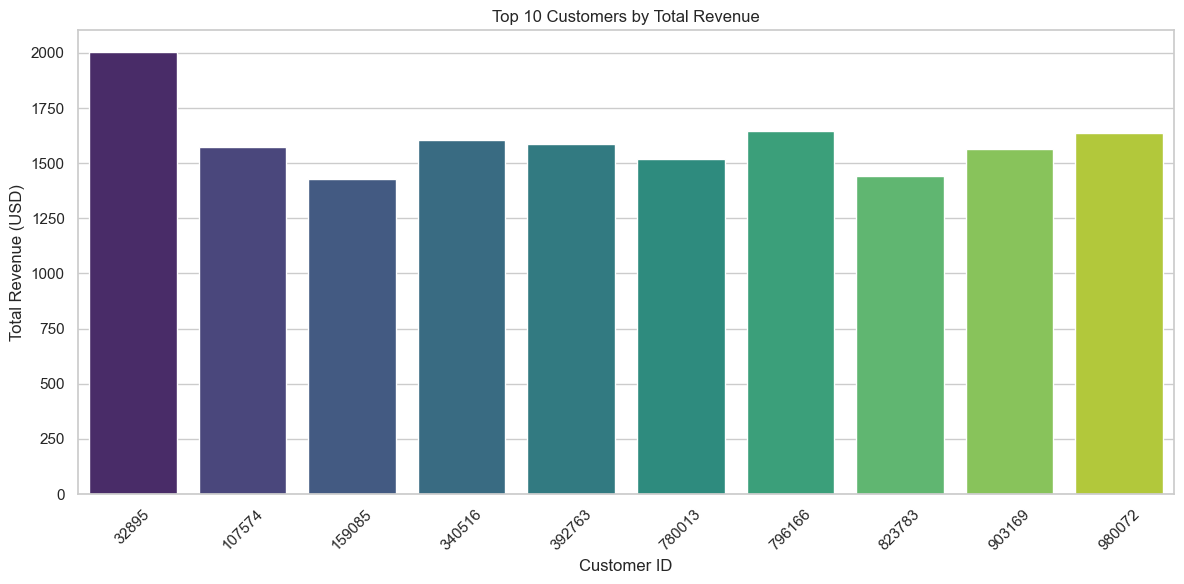

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

top_customers = customer_summary_sorted.head(10)

plt.figure(figsize=(12,6))
sns.barplot(x='CustomerID', y='TotalRevenue', data=top_customers, palette='viridis')
plt.title('Top 10 Customers by Total Revenue')
plt.ylabel('Total Revenue (USD)')
plt.xlabel('Customer ID')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


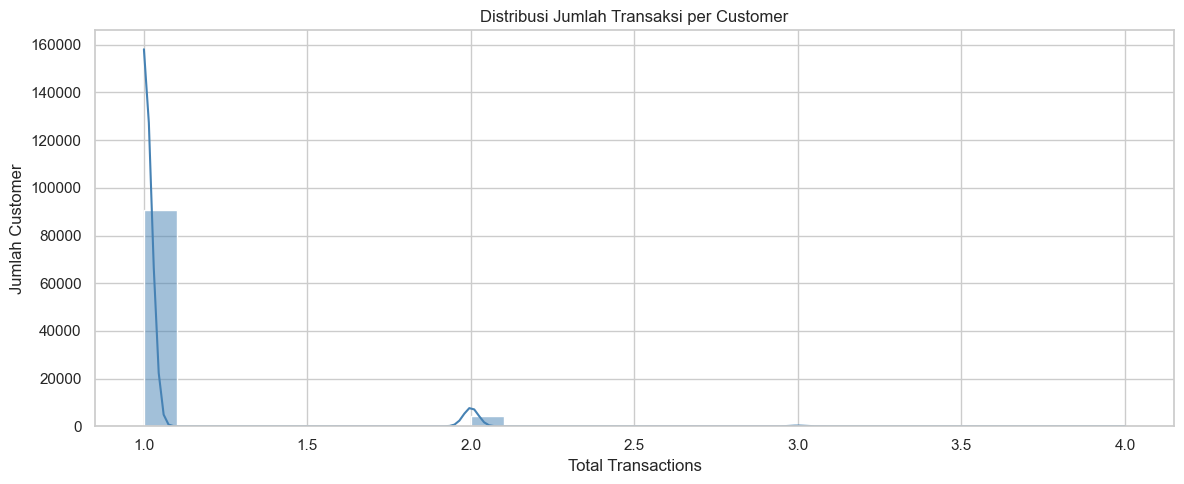

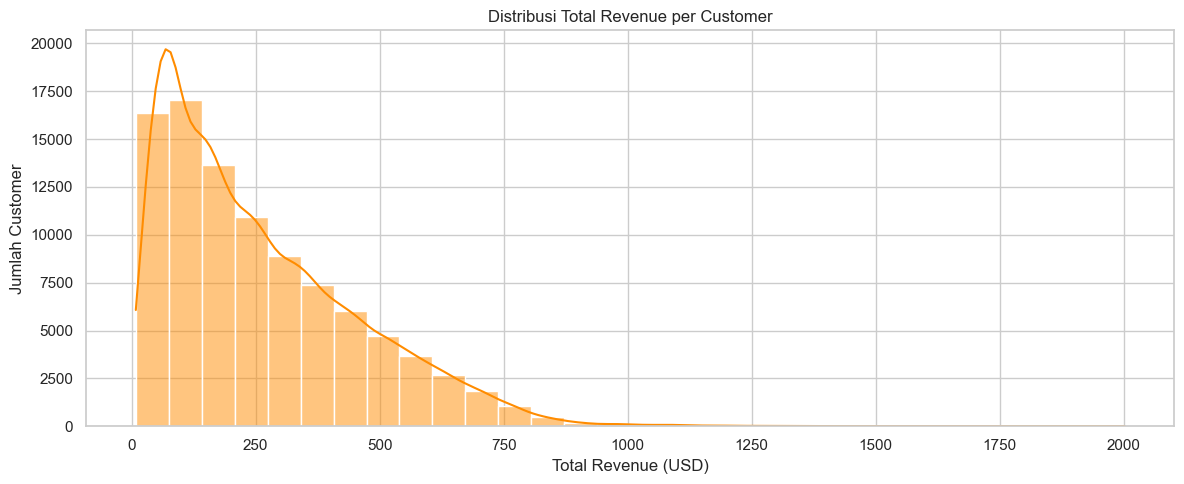

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram: Distribusi Jumlah Transaksi
plt.figure(figsize=(12,5))
sns.histplot(customer_summary['TotalTransactions'], bins=30, kde=True, color='steelblue')
plt.title('Distribusi Jumlah Transaksi per Customer')
plt.xlabel('Total Transactions')
plt.ylabel('Jumlah Customer')
plt.tight_layout()
plt.show()

# Histogram: Distribusi Revenue
plt.figure(figsize=(12,5))
sns.histplot(customer_summary['TotalRevenue'], bins=30, kde=True, color='darkorange')
plt.title('Distribusi Total Revenue per Customer')
plt.xlabel('Total Revenue (USD)')
plt.ylabel('Jumlah Customer')
plt.tight_layout()
plt.show()


## 🧠 Behavioral Clustering - Customer Segmentation

Pada section ini kita akan melakukan clustering berdasarkan perilaku belanja customer. Tujuannya adalah untuk menemukan segmentasi customer seperti:
- Frequent low spenders
- High value but rare shoppers
- Loyal & high spending customers

Kita akan menggunakan fitur berikut:
- Total Transactions
- Total Revenue
- Average Order Value
- Recency (days since last purchase)

Lalu kita akan menerapkan algoritma clustering (KMeans).


In [131]:
from datetime import datetime

# Pastikan 'TransactionDate' dalam datetime format
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

# Ambil tanggal terakhir dari data (asumsi ini data historis lengkap)
max_date = df['TransactionDate'].max()

# Agregasi customer behavior
customer_behavior = df.groupby('CustomerID').agg({
    'TransactionDate': lambda x: (max_date - x.max()).days,  # Recency
    'CustomerID': 'count',                                   # Frequency (total transactions)
    'Revenue': 'sum'                                         # Monetary (total revenue)
}).rename(columns={
    'TransactionDate': 'Recency',
    'CustomerID': 'TotalTransactions',
    'Revenue': 'TotalRevenue'
})

# Tambahkan rata-rata order value
customer_behavior['AvgOrderValue'] = customer_behavior['TotalRevenue'] / customer_behavior['TotalTransactions']

# Reset index supaya CustomerID jadi kolom biasa
customer_behavior = customer_behavior.reset_index()

customer_behavior.head()


,CustomerID,Recency,TotalTransactions,TotalRevenue,AvgOrderValue
0,14,266,1,256.232791,256.232791
1,42,345,1,502.656523,502.656523
2,49,328,1,21.399047,21.399047
3,59,27,2,249.492696,124.746348
4,65,315,1,548.006625,548.006625


### ✨ Preprocessing Data untuk Clustering

Sebelum melakukan clustering, kita perlu melakukan standardisasi terhadap fitur numerik agar semua fitur berada pada skala yang sama. Kita akan menggunakan `StandardScaler` dari `sklearn`.

Setelah itu, kita akan menentukan jumlah cluster optimal menggunakan metode Elbow.


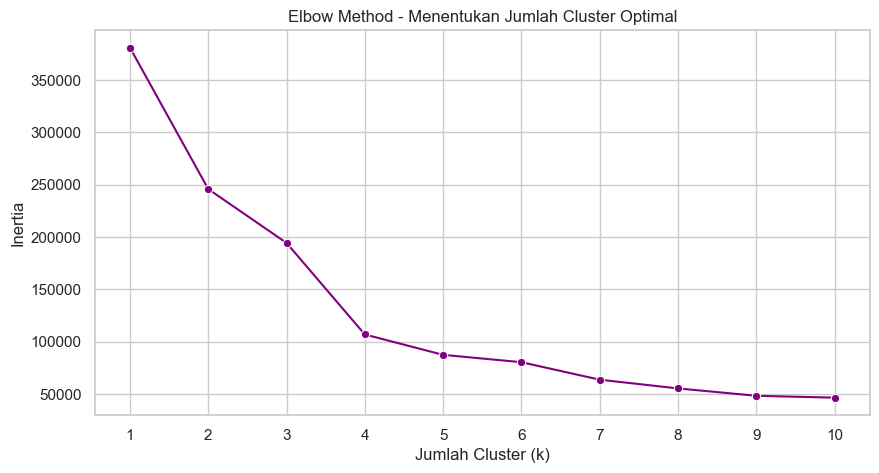

In [132]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Pilih fitur yang akan digunakan
features = ['Recency', 'TotalTransactions', 'TotalRevenue', 'AvgOrderValue']

# Standardisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(customer_behavior[features])

# Coba beberapa jumlah cluster (k)
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(10, 5))
sns.lineplot(x=list(K_range), y=inertia, marker='o', color='purple')
plt.title('Elbow Method - Menentukan Jumlah Cluster Optimal')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.xticks(K_range)
plt.grid(True)
plt.show()


### 🔍 Behavioral Clustering dengan KMeans

Setelah menentukan jumlah cluster optimal, kita akan melakukan clustering dengan KMeans.  
Kita juga akan menambahkan label cluster ke dataframe untuk analisis lebih lanjut.


In [133]:
# Jalankan KMeans dengan k=4 (bisa coba 5 juga nanti untuk perbandingan)
k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
cluster_labels = kmeans.fit_predict(X_scaled)

# Tambahkan hasil clustering ke dataframe asli
customer_behavior['Cluster'] = cluster_labels

# Lihat distribusi customer per cluster
customer_behavior['Cluster'].value_counts().sort_index()


Cluster
0    33032
1    24216
2     4621
3    33346
Name: count, dtype: int64

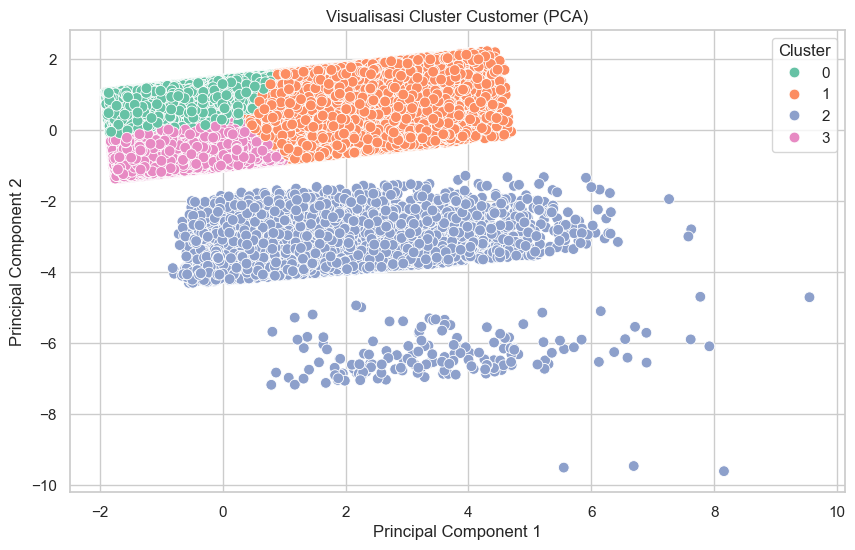

In [134]:
from sklearn.decomposition import PCA

# Reduksi dimensi untuk visualisasi
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)

# Buat dataframe untuk plotting
pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = cluster_labels

# Plot Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set2', s=60)
plt.title('Visualisasi Cluster Customer (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


### 🧠 Interpretasi Hasil Clustering Customer

Kita akan melakukan analisis deskriptif dari masing-masing cluster berdasarkan:
- **Recency**: Seberapa baru transaksi terakhir.
- **TotalTransactions**: Seberapa sering customer bertransaksi.
- **TotalRevenue**: Seberapa besar pengeluaran customer secara total.
- **AvgOrderValue**: Rata-rata pengeluaran per transaksi.

Tujuannya adalah memahami perilaku dari masing-masing segmen customer.


In [135]:
# Lihat statistik rata-rata per cluster
cluster_summary = customer_behavior.groupby('Cluster').agg({
    'Recency': 'mean',
    'TotalTransactions': 'mean',
    'TotalRevenue': 'mean',
    'AvgOrderValue': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'JumlahCustomer'}).round(1)

cluster_summary


,Recency,TotalTransactions,TotalRevenue,AvgOrderValue,JumlahCustomer
Cluster,,,,,
0,275.6,1.0,156.6,156.6,33032
1,181.8,1.0,504.6,504.6,24216
2,118.5,2.0,503.2,247.2,4621
3,89.1,1.0,153.4,153.4,33346


## 🎯 Interpretasi Segmentasi Customer (Behavioral Clustering)

Berdasarkan hasil clustering terhadap perilaku customer, berikut adalah ringkasan dari tiap segmen:

| Cluster | Recency (rata-rata) | Total Transactions | Total Revenue | Avg Order Value | Jumlah Customer | Insight |
|--------|----------------------|---------------------|----------------|------------------|------------------|---------|
| 0      | 275.6 hari           | 1x                  | $156.6         | $156.6           | 33,032           | 🔹 **Pelanggan Lama yang Jarang Belanja** – Kemungkinan pelanggan tidak aktif atau sudah churn. |
| 1      | 181.8 hari           | 1x                  | $504.6         | $504.6           | 24,216           | 💰 **High Value One-Timer** – Sekali belanja, langsung besar. Potensi untuk ditingkatkan loyalitasnya. |
| 2      | 118.5 hari           | 2x                  | $503.2         | $247.2           | 4,621            | ⭐ **Pelanggan Aktif & Loyal** – Belanja lebih dari sekali, nilai cukup tinggi. Target utama untuk retensi. |
| 3      | 89.1 hari            | 1x                  | $153.4         | $153.4           | 33,346           | 🆕 **Pelanggan Baru / Recently Engaged** – Baru-baru ini belanja, bisa digroom jadi loyal. |

### 💡 Strategi Tindak Lanjut:

- **Cluster 0 (Dormant / At-Risk)**:
  - Kirim email re-engagement (kupon diskon, pengingat).
  - Riset kenapa mereka tidak kembali: harga? produk? UX?

- **Cluster 1 (High Value One-Timer)**:
  - Upsell dengan produk pelengkap.
  - Follow-up dengan loyalty program / cashback.

- **Cluster 2 (Champions)**:
  - Beri penghargaan (akses early sale, eksklusif diskon).
  - Minta testimonial, dorong word-of-mouth.

- **Cluster 3 (New Customer)**:
  - Kirim onboarding campaign: highlight produk populer.
  - Insentif transaksi ke-2 (diskon 10% untuk pembelian berikutnya).

Segmentasi ini membantu menyusun strategi pemasaran berbasis data dan mengalokasikan sumber daya secara lebih efisien.
